## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [2]:
dataset = pd.read_csv("Salary_Data.csv")
dataset.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Scatter Plot

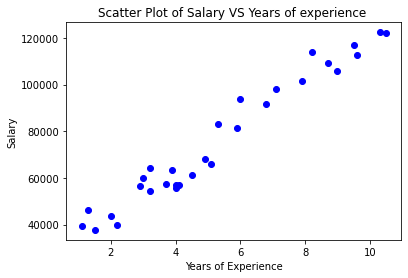

In [4]:
plt.scatter(X,y, color = 'blue')
plt.title('Scatter Plot of Salary VS Years of experience ')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [5]:
y = y.reshape(len(y),1)

## Splitting the dataset into training and test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
print(X_train)

[[10.3]
 [ 8.7]
 [ 4. ]
 [ 1.1]
 [ 2.2]
 [ 5.1]
 [ 2.9]
 [ 4.1]
 [ 4. ]
 [ 7.9]
 [ 1.3]
 [ 1.5]
 [ 9. ]
 [ 2. ]
 [ 7.1]
 [ 9.5]
 [ 5.9]
 [10.5]
 [ 6.8]
 [ 3.2]
 [ 3.9]
 [ 4.5]
 [ 6. ]
 [ 3. ]]


In [8]:
print(X_test)

[[9.6]
 [4.9]
 [8.2]
 [5.3]
 [3.2]
 [3.7]]


In [9]:
print(y_train)

[[122391.]
 [109431.]
 [ 56957.]
 [ 39343.]
 [ 39891.]
 [ 66029.]
 [ 56642.]
 [ 57081.]
 [ 55794.]
 [101302.]
 [ 46205.]
 [ 37731.]
 [105582.]
 [ 43525.]
 [ 98273.]
 [116969.]
 [ 81363.]
 [121872.]
 [ 91738.]
 [ 54445.]
 [ 63218.]
 [ 61111.]
 [ 93940.]
 [ 60150.]]


In [10]:
print(y_test)

[[112635.]
 [ 67938.]
 [113812.]
 [ 83088.]
 [ 64445.]
 [ 57189.]]


## Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)
X_test = sc_X.transform(X_test)
y_test = sc_y.transform(y_test)

In [12]:
print(X_train)

[[ 1.77445774]
 [ 1.21912622]
 [-0.41216011]
 [-1.41869849]
 [-1.03690807]
 [-0.03036969]
 [-0.79395053]
 [-0.37745189]
 [-0.41216011]
 [ 0.94146047]
 [-1.34928205]
 [-1.27986561]
 [ 1.32325088]
 [-1.10632451]
 [ 0.66379471]
 [ 1.49679198]
 [ 0.24729607]
 [ 1.84387418]
 [ 0.55967005]
 [-0.68982587]
 [-0.44686833]
 [-0.23861901]
 [ 0.28200429]
 [-0.75924231]]


In [13]:
print(y_train)

[[ 1.74286179]
 [ 1.27408   ]
 [-0.62397985]
 [-1.26110349]
 [-1.24128155]
 [-0.2958326 ]
 [-0.63537385]
 [-0.61949459]
 [-0.66604723]
 [ 0.98004241]
 [-1.01289511]
 [-1.31941185]
 [ 1.13485615]
 [-1.10983456]
 [ 0.87047913]
 [ 1.54674027]
 [ 0.25882018]
 [ 1.72408881]
 [ 0.63409881]
 [-0.71484249]
 [-0.3975105 ]
 [-0.47372371]
 [ 0.71374831]
 [-0.50848446]]


In [14]:
print(X_test)

[[ 1.5315002 ]
 [-0.09978613]
 [ 1.04558513]
 [ 0.03904675]
 [-0.68982587]
 [-0.51628477]]


In [15]:
print(y_test)

[[ 1.38997327]
 [-0.22678133]
 [ 1.43254705]
 [ 0.3212159 ]
 [-0.35312815]
 [-0.61558808]]


## Implementing Linear Regression using Gradient Descent From Scratch

In [16]:
#Initializing m and c as zero
m = 0
c = 0
#let learning rate equal to 0.0001 and use hit and trial
L = 0.00015
epochs = 15000

n = len(X_train)

for i in range(epochs): 
    y_predt = m * X_train + c  # The current predicted value of Y
    dm = (-2/n) * sum(sum(X_train * (y_train - y_predt)))  # Derivative wrt m
    dc = (-2/n) * sum(sum(y_train - y_predt))  # Derivative wrt c
    m = m - L * dm  # Update m
    c = c - L * dc  # Update c
    
print (m, c)

0.9712071598049453 -7.380207556195573e-18


## Scatter Plot for training dataset using Gradient Descent

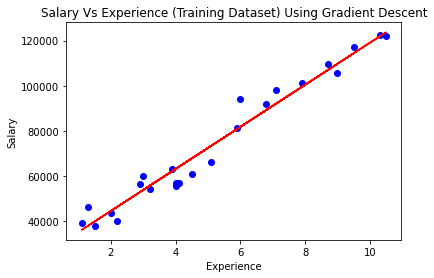

In [23]:
plt.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color = 'blue')
plt.plot(sc_X.inverse_transform(X_train), sc_y.inverse_transform(m * X_train + c), color = 'red')
plt.title('Salary Vs Experience (Training Dataset) Using Gradient Descent')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

## Testing the model

In [18]:
y_pred = sc_y.inverse_transform(m * X_test + c)


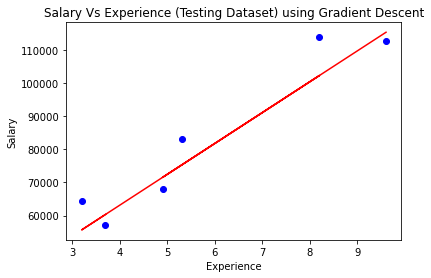

In [25]:
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test), color = 'blue')
plt.plot(sc_X.inverse_transform(X_test), y_pred, color = 'red')
plt.title('Salary Vs Experience (Testing Dataset) using Gradient Descent')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

## Implementing Linear Regression Using Sklearn library

In [21]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
y_predskl = sc_y.inverse_transform(regressor.predict(X_test))
print(y_predskl)

[[115790.21011287]
 [ 71498.27809463]
 [102596.86866063]
 [ 75267.80422384]
 [ 55477.79204548]
 [ 60189.69970699]]


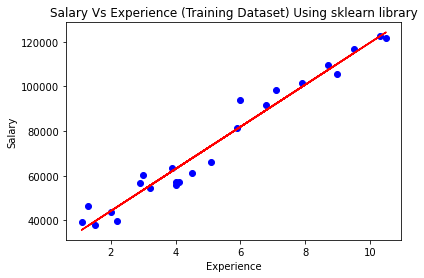

In [24]:
plt.scatter(sc_X.inverse_transform(X_train), sc_y.inverse_transform(y_train), color = 'blue')
plt.plot(sc_X.inverse_transform(X_train), sc_y.inverse_transform(regressor.predict(X_train)), color = 'red')
plt.title('Salary Vs Experience (Training Dataset) Using sklearn library')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

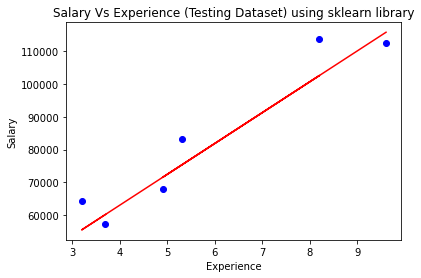

In [26]:
plt.scatter(sc_X.inverse_transform(X_test), sc_y.inverse_transform(y_test), color = 'blue')
plt.plot(sc_X.inverse_transform(X_test), y_predskl, color = 'red')
plt.title('Salary Vs Experience (Testing Dataset) using sklearn library')
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.show()

## Comparing the performance of the models

In [28]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(sc_y.inverse_transform(y_test), y_pred))      #mean_squared_error of scratch model
print(mean_squared_error(sc_y.inverse_transform(y_test), y_predskl))   #mean_squared_error of sklearn model

50186787.511758626
49830096.85590834


In [29]:
from sklearn.metrics import r2_score
print(r2_score(sc_y.inverse_transform(y_test), y_pred))        #r2_score of scratch model
print(r2_score(sc_y.inverse_transform(y_test), y_predskl))     #r2_score of sklearn model

0.9017478737992934
0.9024461774180498
